In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load and prepare the data**

The first step is to load the dataset and prepare it for use in machine learning. Because machine-learning models can't deal with text, we'll use scikit-learn's CountVectorizer class to vectorize the training text. Then we'll split the data for training and testing

In [ ]:
import pandas as pd

df = pd.read_csv('drive/MyDrive/reviews.csv',")
df.head()



,Text,Sentiment
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


Find out how many rows the dataset contains and confirm that there are no missing values.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       50000 non-null  object
 1   Sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


Check for duplicate rows in the dataset.

In [ ]:

df.groupby('Sentiment').describe()


Text                                                               
           count unique                                                top freq
Sentiment                                                                      
0          25000  24697  Nickelodeon has gone down the toilet. They hav...    3
1          25000  24884  Loved today's show!!! It was a variety and not...    5

The dataset contains a few hundred duplicate rows. Let's remove them and check for balance.

In [ ]:
df = df.drop_duplicates()
df.groupby('Sentiment').describe()

Text                                                               
           count unique                                                top freq
Sentiment                                                                      
0          24697  24697  With NBC's "Thank God You're Here", the networ...    1
1          24884  24884  Set in a middle class neighborhood in the imag...    1

Use CountVectorizer to vectorize the text in the DataFrame's "Text" column using a built-in dictionary of stop words. Set min_df to 20 to ignore words that appear less than 20 times in the corpus of training text. This will reduce the likelihood of out-of-memory errors and will probably make the model more accurate as well.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)
x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']

In addition to creating sparse matrices of vectorized text, Countvectorizer converts text to lowercase, removes stop words and punctuation characters, and more. Let's see how it cleans text before vectorizing it by transforming a string, and then reversing the transform.

In [ ]:
text = vectorizer.transform(['The long l3ines   and; pOOr customer# service really turned me off...123.'])
text = vectorizer.inverse_transform(text)
print(text)

[array(['customer', 'long', 'poor', 'really', 'service', 'turned'],
      dtype='<U25')]


Split the dataset for training and testing. We'll do a 50/50 split since the dataset contains nearly 50,000 samples.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

**Train a logistic-regression model**

The next step is to train a classifier. We'll use scikit-learn's LogisticRegression classifier, which uses logistic regression to fit a model to the data

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Validate the trained model with the 50% of the dataset aside for testing and show a confusion matrix.

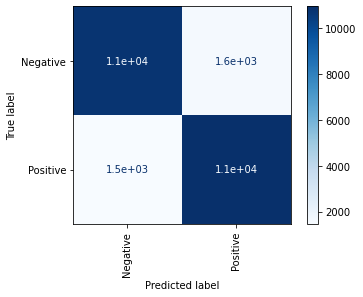

In [ ]:
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, x_test, y_test, display_labels=['Negative', 'Positive'], cmap='Blues', xticks_rotation='vertical')

In [ ]:
model.score(x_test, y_test)

0.8776168770924933

In [ ]:

from sklearn.metrics import roc_auc_score

probabilities = model.predict_proba(x_test)
roc_auc_score(y_test, probabilities[:, 1])

0.9451533344608476


**Use the model to analyze text**

Let's score a review by vectorizing the text of that review and passing it to the model's predict_proba method. Are the results consistent with what you would expect?

In [ ]:

review = 'The long lines and poor customer service really turned me off.'
model.predict_proba(vectorizer.transform([review]))[0][1]

0.09172017741184041

In [ ]:
review = 'The movie was great,enjoyed it a lot .'
model.predict_proba(vectorizer.transform([review]))[0][1]

0.9287105158464884